In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
points_2 = np.loadtxt("../utils/point_sobol2_m2.txt")
points_4 = np.loadtxt("../utils/point_sobol2_m4.txt")
points_6 = np.loadtxt("../utils/point_sobol2_m6.txt")
points_8 = np.loadtxt("../utils/point_sobol2_m8.txt")
points_10 = np.loadtxt("../utils/point_sobol2_m10.txt")
points_12 = np.loadtxt("../utils/point_sobol2_m12.txt")
points_14 = np.loadtxt("../utils/point_sobol2_m14.txt")

In [93]:
def test (x,s):
    f = 1.0
    #s = len(x)
    for i in range(s):
        f *= (1- 0.1*(x[i]-0.5)/((i+1)**2))
        #f *= (1- (x[i]-0.5) * math.exp(-0.16*i))
    return f

In [94]:
def error(points, s):
    exp = 0.0
    err = 0
    for i in range(len(points)):
        exp += test(points[i,:], s)
    exp /= len(points)
    return exp - 1.

In [101]:
s=100
err2 = error(points_2,s)
err4 = error(points_4,s)
err6 = error(points_6,s)
err8 = error(points_8,s)
err10 = error(points_10,s)
err12 = error(points_12,s)
err14 = error(points_14,s)
err = np.array([err2, err4, err6, err8, err10, err12, err14])

#print(err)

num = np.array([2.**2, 2.**4, 2.**6, 2.**8, 2.**10, 2.**12, 2.**14])

c=0.01

rate_d1 =  c*num**(-1)
rate_d2 =  10*c*num**(-2)

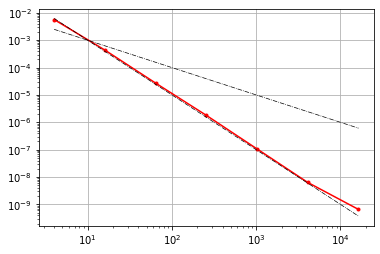

In [102]:
fig, ax = plt.subplots()

ax.loglog(num, err,'r.')
ax.loglog(num, err,'r-')
ax.loglog(num, rate_d1,'k-.',lw=0.7)
ax.loglog(num, rate_d2,'k-.',lw=0.7)

ax.grid()

plt.show()